# Feature Selection with EmoDB, RAVDESS, TESS and CREMA-D
This notebook explores the performance of 3 classifiers with and without feature selection, using EmoDB dataset.

## Load Data
The EMODB database comprises of seven emotions: 1) anger; 2) boredom; 3) anxiety; 4) happiness; 5) sadness; 6) disgust; and 7) neutral.

The data was recorded at a 48-kHz sampling rate and then down-sampled to 16-kHz.

Every utterance is named according to the same scheme:

Example: 03a01Fa.wav is the audio file from Speaker 03 speaking text a01 with the emotion "Freude" (Happiness).

From: https://www.kaggle.com/datasets/piyushagni5/berlin-database-of-emotional-speech-emodb

In [1]:
# built-in imports
import sys
import os
# src imports
module_path = os.path.abspath(os.path.join('..', '..')) 
sys.path.insert(0, module_path)
from src.utils import load_emodb, load_ravdess, load_tess, load_crema_d, filter_emotions, load_iemocap
from src.select_features import FeatureSelector, plot_feature_mask
# 
import numpy as np
import pandas as pd

# load datasets
emo_db = filter_emotions(load_emodb())
ravdess = filter_emotions(load_ravdess())
tess = filter_emotions(load_tess())
crema = filter_emotions(load_crema_d())

# add a dataset column to each dataset
emo_db['dataset'] = 'emodb'
ravdess['dataset'] = 'ravdess'
tess['dataset'] = 'tess'
crema['dataset'] = 'crema'

X = ravdess#pd.concat([tess, crema])

Path to dataset files: /Users/sofiafernandes/.cache/kagglehub/datasets/piyushagni5/berlin-database-of-emotional-speech-emodb/versions/1
Path to dataset files: /Users/sofiafernandes/.cache/kagglehub/datasets/uwrfkaggler/ravdess-emotional-speech-audio/versions/1
['Actor_16', 'Actor_11', 'Actor_18', 'Actor_20', 'Actor_21', 'Actor_19', 'Actor_10', 'Actor_17', 'Actor_04', 'Actor_03', 'Actor_02', 'Actor_05', 'audio_speech_actors_01-24', 'Actor_12', 'Actor_15', 'Actor_23', 'Actor_24', 'Actor_22', 'Actor_14', 'Actor_13', 'Actor_09', 'Actor_07', 'Actor_06', 'Actor_01', 'Actor_08']
Path to dataset files: /Users/sofiafernandes/.cache/kagglehub/datasets/ejlok1/toronto-emotional-speech-set-tess/versions/1
['TESS']
['YAF_disgust', 'OAF_Pleasant_surprise', 'OAF_happy', 'YAF_sad', 'YAF_happy', 'YAF_neutral', 'OAF_Fear', 'OAF_angry', 'YAF_pleasant_surprised', 'YAF_fear', 'OAF_neutral', 'OAF_disgust', 'YAF_angry', 'OAF_Sad']
Path to dataset files: /Users/sofiafernandes/.cache/kagglehub/datasets/ejlok1/c

In [2]:
X.head()

,filename,label,dataset
0,/Users/sofiafernandes/.cache/kagglehub/dataset...,angry,ravdess
1,/Users/sofiafernandes/.cache/kagglehub/dataset...,fear,ravdess
2,/Users/sofiafernandes/.cache/kagglehub/dataset...,fear,ravdess
3,/Users/sofiafernandes/.cache/kagglehub/dataset...,angry,ravdess
4,/Users/sofiafernandes/.cache/kagglehub/dataset...,disgust,ravdess


## Extract features using OpenSMILE

OpenSMILE allows to automaticaly extract the GeMAPS feature set, recommended in some literature.

In [12]:
#!pip install opensmile

import opensmile

# Load data and extract features
smile = opensmile.Smile(
    feature_set=opensmile.FeatureSet.GeMAPSv01b,
    feature_level=opensmile.FeatureLevel.Functionals,
    verbose=True
)

X_train = smile.process_files(X['filename'])
y_train = X['label']
X_test = smile.process_files(emo_db['filename'])
y_test = emo_db['label']
X_train.head()

,,,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,...,alphaRatioUV_sma3nz_amean,hammarbergIndexUV_sma3nz_amean,slopeUV0-500_sma3nz_amean,slopeUV500-1500_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength
file,start,end,,,,,,,,,,,,,,,,,,,,,
/Users/sofiafernandes/.cache/kagglehub/datasets/uwrfkaggler/ravdess-emotional-speech-audio/versions/1/audio_speech_actors_01-24/Actor_16/03-01-05-01-02-01-16.wav,0 days,0 days 00:00:03.903895833,36.663185,0.092193,33.923561,36.607681,39.911366,5.987804,234.625992,278.505188,229.474777,402.364685,...,-3.616390,12.552123,0.088287,0.012799,1.799486,1.822917,0.204286,0.120458,0.321429,0.410833
/Users/sofiafernandes/.cache/kagglehub/datasets/uwrfkaggler/ravdess-emotional-speech-audio/versions/1/audio_speech_actors_01-24/Actor_16/03-01-06-01-02-02-16.wav,0 days,0 days 00:00:03.570229167,38.592869,0.083782,35.799889,39.018208,41.324265,5.524376,41.661167,45.850269,45.512527,26.246408,...,1.545301,7.040791,0.111506,0.012556,2.808989,1.139601,0.312500,0.162692,0.540000,0.446822
/Users/sofiafernandes/.cache/kagglehub/datasets/uwrfkaggler/ravdess-emotional-speech-audio/versions/1/audio_speech_actors_01-24/Actor_16/03-01-06-02-01-02-16.wav,0 days,0 days 00:00:03.737062500,47.691246,0.117621,45.381668,46.748459,50.922649,5.540981,173.288620,104.474289,30.014435,10.889656,...,3.569757,4.595000,0.062252,0.000030,2.419355,1.634877,0.245000,0.206377,0.410000,0.385071
/Users/sofiafernandes/.cache/kagglehub/datasets/uwrfkaggler/ravdess-emotional-speech-audio/versions/1/audio_speech_actors_01-24/Actor_16/03-01-05-02-01-01-16.wav,0 days,0 days 00:00:03.970645833,39.567497,0.156933,35.898926,40.488960,43.685249,7.786324,168.711563,148.852676,128.481461,119.730644,...,-4.357206,13.465850,0.074365,0.008484,2.525253,1.534527,0.270000,0.163197,0.358333,0.450830
/Users/sofiafernandes/.cache/kagglehub/datasets/uwrfkaggler/ravdess-emotional-speech-audio/versions/1/audio_speech_actors_01-24/Actor_16/03-01-07-01-01-01-16.wav,0 days,0 days 00:00:03.770437500,35.005974,0.106174,31.523083,34.555748,38.189644,6.666561,99.787117,77.171021,34.780659,24.179268,...,-0.447962,8.241088,0.094444,0.012590,2.659575,1.347709,0.238000,0.165094,0.480000,0.446318


In [13]:
X_train.to_csv('ravdess_GeMAPS.csv', index=False)
X_test.to_csv('emodb_GeMAPS.csv', index=False)

In [57]:
import numpy as np
import librosa

def extract_ser_features(filename, sr=16000, n_mfcc=13, hop_length=512, frame_len=1024):
    """
    Extract SER features from a single audio file:
    - MFCC + delta + delta-delta
    - Pitch (F0) + delta + delta-delta
    - Energy + delta + delta-delta
    - MEDC + delta + delta-delta
    Returns a single 1D feature vector (statistics across frames)
    """
    y, sr = librosa.load(filename, sr=sr)

    # ---------------- MFCC
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc, hop_length=hop_length)
    mfcc_delta = librosa.feature.delta(mfcc)
    mfcc_delta2 = librosa.feature.delta(mfcc, order=2)
    mfcc_all = np.concatenate([mfcc_delta, mfcc_delta2], axis=0)  # (n_mfcc*3, n_frames)

    # ---------------- Pitch / F0
    f0, voiced_flag, _ = librosa.pyin(y, fmin=50, fmax=500, sr=sr, frame_length=frame_len, hop_length=hop_length)
    f0 = np.nan_to_num(f0)  # replace NaN with 0
    f0_delta = np.diff(f0, n=1, prepend=0)
    f0_delta2 = np.diff(f0, n=2, prepend=[0,0])
    f0_all = np.vstack([f0_delta, f0_delta2])  # shape (3, n_frames)

    # ---------------- Energy
    energy = np.array([np.sum(y[i:i+frame_len]**2) for i in range(0, len(y), hop_length)])
    energy_delta = np.diff(energy, n=1, prepend=0)
    energy_delta2 = np.diff(energy, n=2, prepend=[0,0])
    energy_all = np.vstack([energy_delta, energy_delta2])  # shape (3, n_frames)

    # ---------------- MEDC
    medc = np.array([np.mean(np.abs(np.diff(y[i:i+frame_len]))) for i in range(0, len(y), hop_length)])
    medc_delta = np.diff(medc, n=1, prepend=0)
    medc_delta2 = np.diff(medc, n=2, prepend=[0,0])
    medc_all = np.vstack([medc_delta, medc_delta2])  # shape (3, n_frames)

    n_frames = min(mfcc.shape[1], f0_all.shape[1], energy_all.shape[1], medc_all.shape[1])
    mfcc_all = mfcc_all[:, :n_frames]
    f0_all = f0_all[:, :n_frames]
    energy_all = energy_all[:, :n_frames]
    medc_all = medc_all[:, :n_frames]
    # ---------------- Combine all features
    features = np.concatenate([mfcc_all, energy_all, medc_all], axis=0)  # (n_features, n_frames)
    #features = np.concatenate([mfcc_delta, mfcc_delta2, medc_delta, medc_delta2, energy_delta, energy_delta2], axis=0)  # (n_features, n_frames)
    # ---------------- Statistics across frames
    feat_mean = np.mean(features, axis=1)
    feat_std = np.std(features, axis=1)
    feature_vector = np.concatenate([feat_mean, feat_std])

    return feature_vector


# Extract MFCC, MEDC, and Energy features
feats_df = emo_db['filename'].apply(lambda x: extract_ser_features(x))
feats_df = pd.DataFrame(feats_df.tolist())
feats_df.fillna(0, inplace=True)  # Handle any NaN values
feats_df.head()

/Users/sofiafernandes/miniconda3/envs/varm/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,-4.186210,-0.311187,0.726901,-0.983336,0.812946,0.717983,0.499521,0.318882,0.478482,0.275620,...,2.188148,2.145377,2.020047,1.973504,1.571724,1.217646,10.800871,11.129848,0.022868,0.023306
1,-2.238620,-0.695976,0.726951,-0.992514,-0.156849,0.734373,0.122376,0.651528,0.261532,-0.467042,...,1.844949,1.825037,1.759995,1.205096,0.714355,1.134027,9.090360,13.242889,0.046274,0.052561
2,0.422447,-0.287714,0.185504,0.064372,-0.050603,-0.054420,-0.168262,-0.029884,-0.136090,-0.024907,...,1.585625,1.688831,1.382092,1.246606,1.263704,0.959769,17.628410,22.259501,0.024092,0.024154
3,0.201440,-0.288057,-0.165678,-0.337156,0.068284,-0.022591,0.100314,0.049942,0.095073,0.080606,...,1.174396,1.967465,1.720487,1.135737,1.807683,1.754777,18.754288,21.380540,0.026169,0.029444
4,-3.017660,-1.284831,-0.247312,0.038274,-0.113077,-0.026328,0.376950,-0.051381,-0.056545,0.085305,...,1.936396,1.656446,1.717357,1.227744,1.654048,0.826702,23.092734,29.229650,0.028687,0.033058


In [3]:
import numpy as np
import librosa

def extract_ser_features(filename, sr=16000, n_mfcc=13,
                         frame_len=0.5, frame_shift=0.1):
    """
    Extracts a comprehensive set of audio features for Speech Emotion Recognition (SER).

    Args:
        filename (str): Path to the audio file.
        sr (int): Sampling rate. Defaults to 16000 Hz.
        n_mfcc (int): Number of MFCCs to compute. Defaults to 13.
        frame_len (float): Length of a single frame in seconds. Defaults to 0.025s.
        frame_shift (float): Time shift between adjacent frames in seconds. Defaults to 0.010s.

    Returns:
        np.ndarray: A single feature vector containing the mean and standard deviation
                    of all extracted features.
    """
    try:
        y, sr = librosa.load(filename, sr=sr, res_type='kaiser_fast')
    except Exception as e:
        print(f"Error loading {filename}: {e}")
        return np.zeros(n_mfcc * 3 * 2 + 8)  # Return a zero vector for consistency
    
    # Define frame and hop lengths in samples
    frame_length_samples = int(frame_len * sr)
    hop_length_samples = int(frame_shift * sr)
    
    # ------------------ Extract Core Features ------------------
    # MFCCs
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc,
                                n_fft=frame_length_samples,
                                hop_length=hop_length_samples)
    
    # Fundamental Frequency (F0)
    # Using librosa.pyin for robust pitch detection
    f0, voiced_flag, voiced_probs = librosa.pyin(y=y, sr=sr,
                                                 fmin=librosa.note_to_hz('C2'),
                                                 fmax=librosa.note_to_hz('C7'),
                                                 frame_length=frame_length_samples,
                                                 hop_length=hop_length_samples)
    
    

    # Energy
    power_spec = np.abs(librosa.stft(y=y, n_fft=frame_length_samples,
                                     hop_length=hop_length_samples))**2
    energy = np.sum(power_spec, axis=0)

    # Median-based energy delta (MEDC)
    # Corrected: Calculate diff on the real-valued power spectrogram
    medc = np.mean(np.abs(np.diff(power_spec, axis=1)), axis=0)

    # ------------------ Align Features to the Same Frame Count ------------------
    min_frames = min(mfcc.shape[1], f0.shape[0], energy.shape[0], medc.shape[0])
    
    mfcc   = mfcc[:, :min_frames]
    f0     = f0[:min_frames]
    energy = energy[:min_frames]
    medc   = medc[:min_frames]
    
    # Handle NaN values from librosa.pyin
    f0 = np.nan_to_num(f0)

    # ------------------ Compute Deltas (first and second derivatives) ------------------
    mfcc_delta  = librosa.feature.delta(mfcc)
    mfcc_delta2 = librosa.feature.delta(mfcc, order=2)

    f0_delta  = np.diff(f0, n=1, prepend=f0[0])
    f0_delta2 = np.diff(f0, n=2, prepend=[f0[0], f0[0]])
    
    energy_delta  = np.diff(energy, n=1, prepend=energy[0])
    energy_delta2 = np.diff(energy, n=2, prepend=[energy[0], energy[0]])

    medc_delta  = np.diff(medc, n=1, prepend=medc[0])
    medc_delta2 = np.diff(medc, n=2, prepend=[medc[0], medc[0]])

    # ------------------ Combine All Features ------------------
    all_feats = np.vstack([
        mfcc_delta, mfcc_delta2,
        f0[np.newaxis, :], f0_delta[np.newaxis, :], f0_delta2[np.newaxis, :],
        energy_delta[np.newaxis, :], energy_delta2[np.newaxis, :],
        medc_delta[np.newaxis, :], medc_delta2[np.newaxis, :]
    ])

    # ------------------ Compute Statistics and Return ------------------
    # The final feature vector is a single, flat array of mean and std dev
    feat_mean = np.mean(all_feats, axis=1)
    feat_std = np.std(all_feats, axis=1)
    
    feature_vector = np.concatenate([feat_mean, feat_std])

    return feature_vector
from tqdm import tqdm
tqdm.pandas()
# Extract MFCC, MEDC, and Energy features
feats_df = emo_db['filename'].progress_apply(lambda x: extract_ser_features(x))
feats_df = pd.DataFrame(feats_df.tolist())
feats_df.fillna(0, inplace=True)  # Handle any NaN values
print(feats_df.info())
feats_df.head()

100%|██████████| 454/454 [02:59<00:00,  2.53it/s]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 66 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       454 non-null    float64
 1   1       454 non-null    float64
 2   2       454 non-null    float64
 3   3       454 non-null    float64
 4   4       454 non-null    float64
 5   5       454 non-null    float64
 6   6       454 non-null    float64
 7   7       454 non-null    float64
 8   8       454 non-null    float64
 9   9       454 non-null    float64
 10  10      454 non-null    float64
 11  11      454 non-null    float64
 12  12      454 non-null    float64
 13  13      454 non-null    float64
 14  14      454 non-null    float64
 15  15      454 non-null    float64
 16  16      454 non-null    float64
 17  17      454 non-null    float64
 18  18      454 non-null    float64
 19  19      454 non-null    float64
 20  20      454 non-null    float64
 21  21      454 non-null    float64
 22  22

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,65
0,1.834822,3.108243,-3.257174,-0.816295,-1.402727,3.421232,-0.425082,1.445254,0.232207,0.213567,...,1.821736,0.746908,0.717164,72.538173,62.414237,90.720126,93194.667627,119562.184601,16.351523,23.477521
1,6.767185,1.881389,0.164315,-3.947631,-1.677326,-1.726068,0.476161,0.974883,-0.426813,0.466203,...,0.416361,0.441656,0.354464,76.039573,39.605519,57.745639,59455.565617,52666.955011,11.411999,13.743748
2,-1.521756,-2.011519,-0.503752,1.285475,0.790883,0.184642,0.541749,-0.277947,-0.585593,-0.253535,...,0.905826,1.230785,0.799921,102.989505,63.936536,97.282376,102610.314824,127213.846817,27.645782,49.236952
3,-2.587303,0.513570,1.617092,0.808510,1.033325,-0.597573,-0.651672,-0.233608,-0.362232,-0.567972,...,0.876541,0.947407,2.001595,129.849155,74.577124,112.707182,150667.802875,187910.686647,30.459928,50.853837
4,-10.494789,5.219285,-4.350497,1.085607,-0.166213,1.497606,-0.111989,0.424257,1.266142,1.264845,...,0.825649,1.713442,1.605305,37.647222,43.121930,68.488668,157694.809789,202740.621733,20.415424,35.040019


## Split dataset

In [12]:
#!pip install sklearn
from sklearn.model_selection import train_test_split

# Split data
X = feats_df.values
y = emo_db.label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

print(X_train.shape, X_test.shape)

(408, 62) (46, 62)


In [14]:
from sklearn.model_selection import train_test_split
X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

## Comparison Experiments
We will start by observating the effect of feature scalling with the same parameters.

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
emotions = y_train.unique()

## Simple SVM(1) classifier without feature scaling (1)
#clf11 = svm.SVC(kernel='linear')
#clf11.fit(X_train, y_train)
#pred11 = clf11.predict(X_test)
#print("Performance SVM without feature scaling\n", classification_report(y_test, pred11, target_names=set(emotions)))

## Simple SVM(1) classifier with feature scaling (2)
# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Train the model
clf12 = svm.SVC(kernel='poly', C=10, gamma='scale')
#clf12 = svm.SVC(kernel='linear')
clf12.fit(X_train_scaled, y_train)
pred12 = clf12.predict(X_test_scaled)
print("Performance SVM with feature scaling\n", classification_report(y_test, pred12)) #, target_names=set(emotions)))

Performance SVM with feature scaling
               precision    recall  f1-score   support

       angry       0.63      0.53      0.58        32
     disgust       0.54      0.58      0.56        24
        fear       0.62      0.62      0.62        26
       happy       0.50      0.58      0.54        26
     neutral       0.82      0.78      0.80        18
         sad       0.68      0.58      0.62        26
    surprise       0.74      0.89      0.81        19

    accuracy                           0.63       171
   macro avg       0.65      0.65      0.65       171
weighted avg       0.64      0.63      0.63       171



In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

#scaler = StandardScaler().fit(X_train)

# Create a pipeline scale-alg1 feature selection- svm
pipe = Pipeline([
    ('scaler1', StandardScaler()),
    #('feature_selection', FeatureSelector()),
    #('scaler2', StandardScaler()),
    ('svm', svm.SVC())
])

# Define parameter grid
param_grid = {
    'svm__C': [0.1, 1, 10, 100],
    'svm__gamma': ['scale', 'auto'],
    'svm__kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipe, param_grid, cv=10, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)
# Predict on the test set using the best estimator
best_model = grid_search.best_estimator_
pred = best_model.predict(X_test)
print("Performance SVM with feature selection\n", classification_report(y_test, pred, target_names=set(emotions)))

Fitting 10 folds for each of 32 candidates, totalling 320 fits


[CV] END ...svm__C=0.1, svm__gamma=scale, svm__kernel=linear; total time=   0.3s
[CV] END ...svm__C=0.1, svm__gamma=scale, svm__kernel=linear; total time=   0.3s
[CV] END ...svm__C=0.1, svm__gamma=scale, svm__kernel=linear; total time=   0.3s
[CV] END ...svm__C=0.1, svm__gamma=scale, svm__kernel=linear; total time=   0.3s
[CV] END ...svm__C=0.1, svm__gamma=scale, svm__kernel=linear; total time=   0.3s
[CV] END ...svm__C=0.1, svm__gamma=scale, svm__kernel=linear; total time=   0.3s
[CV] END ...svm__C=0.1, svm__gamma=scale, svm__kernel=linear; total time=   0.4s
[CV] END ...svm__C=0.1, svm__gamma=scale, svm__kernel=linear; total time=   0.3s
[CV] END ...svm__C=0.1, svm__gamma=scale, svm__kernel=linear; total time=   0.4s
[CV] END ...svm__C=0.1, svm__gamma=scale, svm__kernel=linear; total time=   0.4s
[CV] END ......svm__C=0.1, svm__gamma=scale, svm__kernel=rbf; total time=   0.8s
[CV] END ......svm__C=0.1, svm__gamma=scale, svm__kernel=rbf; total time=   0.7s
[CV] END ......svm__C=0.1, s

In [15]:
from sklearn.preprocessing import StandardScaler, RobustScaler
# Create a pipeline scale-alg1 feature selection- svm
pipe = Pipeline([
    ('scaler1', StandardScaler()),
    
    ('feature_selection1', FeatureSelector(algorithm="algorithm1", L=0.71, MS=0.75, dispersion_measure="MAD", similarity_measure="AC")),
    ('scaler2', StandardScaler()),
    ('feature_selection2', FeatureSelector(algorithm="algorithm2", L=0.99, MS=0.75, dispersion_measure="MAD", similarity_measure="AC")),
    ('svm', svm.SVC())
])

# Define parameter grid
param_grid = {
    'svm__C': [0.1, 1, 10, 50, 100],
    'svm__gamma': ['scale', 'auto'],
    'svm__kernel': ['linear', 'rbf', 'poly', 'sigmoid']

}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipe, param_grid, cv=10, n_jobs=-1, verbose=0)
grid_search.fit(X_train, y_train)

# Predict on the test set using the best estimator
best_model = grid_search.best_estimator_
pred = best_model.predict(X_test)

print(classification_report(y_test, pred, target_names=best_model.classes_))

print("Best parameters found: ", grid_search.best_params_)

              precision    recall  f1-score   support

       angry       0.69      0.69      0.69        13
     disgust       0.80      0.80      0.80         5
        fear       1.00      1.00      1.00         7
       happy       0.43      0.43      0.43         7
     neutral       0.88      0.88      0.88         8
         sad       1.00      1.00      1.00         6

    accuracy                           0.78        46
   macro avg       0.80      0.80      0.80        46
weighted avg       0.78      0.78      0.78        46

Best parameters found:  {'svm__C': 50, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}


In [64]:
import os
import numpy as np
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
import librosa
from PIL import Image

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from sklearn.metrics import recall_score, classification_report

# ---------------------------
# Settings
# ---------------------------
SR = 44000
N_MFCC = 77
MAX_LEN = 300               # number of frames (time axis) for MFCC (pad/truncate)
IMG_SIZE = 224              # CNN input size (224x224)
RANDOM_STATE = 42

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# ---------------------------
# 1) MFCC extraction function
# ---------------------------
def extract_mfcc(file_path, n_mfcc=N_MFCC, max_len=MAX_LEN, sr=SR):
    y, sr = librosa.load(file_path, sr=sr)
    mfcc = librosa.feature.mfcc(y=y, sr=len(y)/sr, n_mfcc=n_mfcc)
    # Pad/truncate on time axis
    if mfcc.shape[1] < max_len:
        pad_width = max_len - mfcc.shape[1]
        mfcc = np.pad(mfcc, ((0, 0), (0, pad_width)), mode="constant")
    else:
        mfcc = mfcc[:, :max_len]
    return mfcc  # shape (n_mfcc, max_len)

# ---------------------------
# 2) CNN feature extractor (AlexNet pretrained) - moved to device
# ---------------------------
cnn = models.alexnet(pretrained=True)
feature_extractor = nn.Sequential(*list(cnn.children())[:-1])  # remove classifier
feature_extractor.to(device)
feature_extractor.eval()

# Transforms: expect a PIL image (H x W x C)
transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),       # Converts to [C,H,W], floats in [0,1]
    # optionally normalize with ImageNet stats if desired:
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

def mfcc_to_cnn_tensor(mfcc):
    """
    Convert MFCC (n_mfcc, time) to a PIL image (H=W=IMG_SIZE) and then to tensor.
    We normalize MFCC to 0-255 and stack to 3 channels (H x W x 3).
    """
    # Normalize to 0-255 uint8
    mm_min = mfcc.min()
    mm_max = mfcc.max()
    if mm_max - mm_min > 1e-8:
        mfcc_norm = (mfcc - mm_min) / (mm_max - mm_min)
    else:
        mfcc_norm = mfcc - mm_min  # constant
    mfcc_uint8 = (mfcc_norm * 255.0).astype(np.uint8)  # shape (n_mfcc, time)

    # convert to HWC  (height = n_mfcc, width = time)
    h, w = mfcc_uint8.shape
    img_hwc = np.stack([mfcc_uint8, mfcc_uint8, mfcc_uint8], axis=2)  # (H, W, 3)
    pil_img = Image.fromarray(img_hwc)  # PIL image

    tensor = transform(pil_img)  # (3, IMG_SIZE, IMG_SIZE), float tensor
    return tensor.unsqueeze(0).to(device)  # (1, 3, IMG_SIZE, IMG_SIZE) on device

def cnn_features(mfcc):
    """
    Given a single mfcc (n_mfcc, max_len), return flattened CNN feature vector (numpy).
    """
    inp = mfcc_to_cnn_tensor(mfcc)  # (1,3,224,224)
    with torch.no_grad():
        feats = feature_extractor(inp)             # e.g., shape (1, 256, 6, 6)
        feats = feats.view(feats.size(0), -1)      # (1, n_feat)
        feats_np = feats.cpu().numpy().squeeze(0)  # (n_feat,)
    return feats_np

# ---------------------------
# 3) Build dataset from emo_db DataFrame
#    Assumes: emo_db is a pandas DataFrame with columns 'filename' and 'label'
# ---------------------------
if 'emo_db' not in globals():
    raise RuntimeError("emo_db DataFrame not found. Please load it (must have 'filename' and 'label').")

X_list = []
y_list = []

print("Extracting features for", len(emo_db), "samples...")
for idx, row in emo_db.iterrows():
    fname = row["filename"]
    if not os.path.exists(fname):
        raise FileNotFoundError(f"File not found: {fname}")
    mfcc = extract_mfcc(fname)
    feats = cnn_features(mfcc)   # 1D numpy array
    X_list.append(feats)
    y_list.append(row["label"])

X = np.vstack(X_list)  # shape (n_samples, n_features)
y = np.array(y_list)   # shape (n_samples,)

print("Raw feature matrix shape:", X.shape)
print("Raw labels shape:", y.shape)

# ---------------------------
# 4) Encode labels and train/test split (stratified)
# ---------------------------
le = LabelEncoder()
y_enc = le.fit_transform(y)  # 1D integer array

X_train, X_test, y_train, y_test = train_test_split(
    X, y_enc, test_size=0.2, stratify=y_enc, random_state=RANDOM_STATE
)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)
print("Classes:", le.classes_)

# ---------------------------
# 5) Pipeline: scaler -> NCA -> SVM (GridSearch on train only)
# ---------------------------
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("nca", NeighborhoodComponentsAnalysis(random_state=RANDOM_STATE)),
    ("svm", SVC())
])

param_grid = {
    # n_components must be <= n_features and <= n_train_samples-1; we'll pick reasonable values
    "nca__n_components": [min(20, X_train.shape[1]), min(50, X_train.shape[1])],
    "svm__C": [0.1, 1, 10],
    "svm__gamma": ["scale", "auto"],
    "svm__kernel": ["rbf"]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

grid = GridSearchCV(
    pipeline,
    param_grid,
    cv=cv,
    scoring="balanced_accuracy",  # proxy for UAR
    n_jobs=-1,
    verbose=2
)

print("Starting GridSearchCV on training set...")
grid.fit(X_train, y_train)

# ---------------------------
# 6) Evaluation on held-out test set
# ---------------------------
best_model = grid.best_estimator_
print("Best params:", grid.best_params_)

pred_test = best_model.predict(X_test)
uar = recall_score(y_test, pred_test, average="macro")
print("Test UAR (macro recall):", uar)
print(classification_report(y_test, pred_test, target_names=le.classes_))


Using device: cpu


/Users/sofiafernandes/miniconda3/envs/varm/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/sofiafernandes/miniconda3/envs/varm/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Extracting features for 454 samples...
Raw feature matrix shape: (454, 9216)
Raw labels shape: (454,)
Train shape: (363, 9216) (363,)
Test shape: (91, 9216) (91,)
Classes: ['angry' 'disgust' 'fear' 'happy' 'neutral' 'sad']
Starting GridSearchCV on training set...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END nca__n_components=20, svm__C=0.1, svm__gamma=scale, svm__kernel=rbf; total time=   3.2s
[CV] END nca__n_components=20, svm__C=0.1, svm__gamma=auto, svm__kernel=rbf; total time=   3.2s
[CV] END nca__n_components=20, svm__C=0.1, svm__gamma=scale, svm__kernel=rbf; total time=   3.4s
[CV] END nca__n_components=20, svm__C=0.1, svm__gamma=auto, svm__kernel=rbf; total time=   3.4s
[CV] END nca__n_components=20, svm__C=0.1, svm__gamma=scale, svm__kernel=rbf; total time=   4.0s
[CV] END nca__n_components=20, svm__C=0.1, svm__gamma=auto, svm__kernel=rbf; total time=   4.1s
[CV] END nca__n_components=20, svm__C=1, svm__gamma=scale, svm__kernel=rbf; total time=   4.2s
[

## Feature selection with algorithm 1

In [13]:

# Create a FeatureSelector object with algorithm1 and L=0.95
L=0.95
fs = FeatureSelector(algorithm="algorithm1", L=L)
fs_scaled = FeatureSelector(algorithm="algorithm1", L=L)
# Fit the selector to both scaled and not scaled training data
fs.fit(X_train)
fs_scaled.fit(X_train_scaled)
print("Number of features selected without scaling:", len(fs.selected_indices))
X_train_sel = fs.transform(X_train)
X_test_sel = fs.transform(X_test)
X_train_scaled_sel = fs.transform(X_train_scaled)
X_test_scaled_sel = fs.transform(X_test_scaled)
print("Number of features selected with scaling:", len(fs_scaled.selected_indices))
X_train_selscaled = fs_scaled.transform(X_train)
X_test_selscaled = fs_scaled.transform(X_test)
X_train_scaled_selscaled = fs_scaled.transform(X_train_scaled)
X_test_scaled_selscaled = fs_scaled.transform(X_test_scaled)


## SVM(1) Algorithm1 without scaling and SVM without scaling(3)
clf13 = svm.SVC(kernel='linear')
clf13.fit(X_train_sel, y_train)
pred13 = clf13.predict(X_test_sel)
#print(classification_report(y_test, pred13, target_names=set(emotions)))
print("SVM(1) Algorithm1 without scaling and SVM without scaling(3) Accuracy:", accuracy_score(y_test, pred13))

## SVM(1) Algorithm1 with scaling and SVM without scaling (4)
clf14 = svm.SVC(kernel='linear')
clf14.fit(X_train_selscaled, y_train)
pred14 = clf14.predict(X_test_selscaled)
#print(classification_report(y_test, pred14, target_names=set(emotions)))
print("SVM(1) Algorithm1 with scaling and SVM without scaling (4) Accuracy:", accuracy_score(y_test, pred14))

## SVM(1) Algorithm1 without scaling and SVM with scaling(5)
clf15 = svm.SVC(kernel='linear')
clf15.fit(X_train_scaled_sel, y_train)
pred15 = clf15.predict(X_test_scaled_sel)
#print(classification_report(y_test, pred15, target_names=set(emotions)))
print("SVM(1) Algorithm1 without scaling and SVM with scaling(5) Accuracy:", accuracy_score(y_test, pred15))

## SVM(1) Algorithm1 with scaling and SVM with scaling (6)
clf16 = svm.SVC(kernel='linear')
clf16.fit(X_train_scaled_selscaled, y_train)
pred16 = clf16.predict(X_test_scaled_selscaled)
#print(classification_report(y_test, pred16, target_names=set(emotions)))
print("SVM(1) Algorithm1 with scaling and SVM with scaling (6) Accuracy:", accuracy_score(y_test, pred16))

## SVM(1) Algorithm1 without scaling but fit Scaler on selected features (7)
scaler_sel = StandardScaler()
X_train_7 = scaler_sel.fit_transform(X_train_sel)
X_test_7 = scaler_sel.transform(X_test_sel) 
clf17 = svm.SVC(kernel='linear')
clf17.fit(X_train_7, y_train)
pred17 = clf17.predict(X_test_7)
#print(classification_report(y_test, pred17, target_names=set(emotions)))
print("SVM(1) Algorithm1 without scaling but fit Scaler on selected features (7) Accuracy:", accuracy_score(y_test, pred17))

Number of features selected without scaling: 58
Number of features selected with scaling: 58
SVM(1) Algorithm1 without scaling and SVM without scaling(3) Accuracy: 0.7362637362637363
SVM(1) Algorithm1 with scaling and SVM without scaling (4) Accuracy: 0.6923076923076923
SVM(1) Algorithm1 without scaling and SVM with scaling(5) Accuracy: 0.7582417582417582
SVM(1) Algorithm1 with scaling and SVM with scaling (6) Accuracy: 0.8021978021978022
SVM(1) Algorithm1 without scaling but fit Scaler on selected features (7) Accuracy: 0.7582417582417582


              precision    recall  f1-score   support

         sad       0.83      0.89      0.86        28
       happy       0.79      0.79      0.79        14
     disgust       0.73      0.62      0.67        13
     neutral       0.75      0.75      0.75        12
        fear       0.82      0.75      0.78        12
       angry       0.85      0.92      0.88        12

    accuracy                           0.80        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.80      0.80      0.80        91



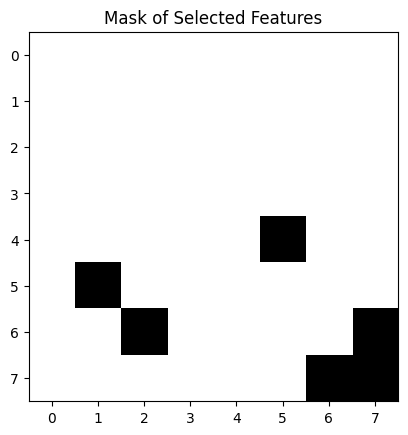

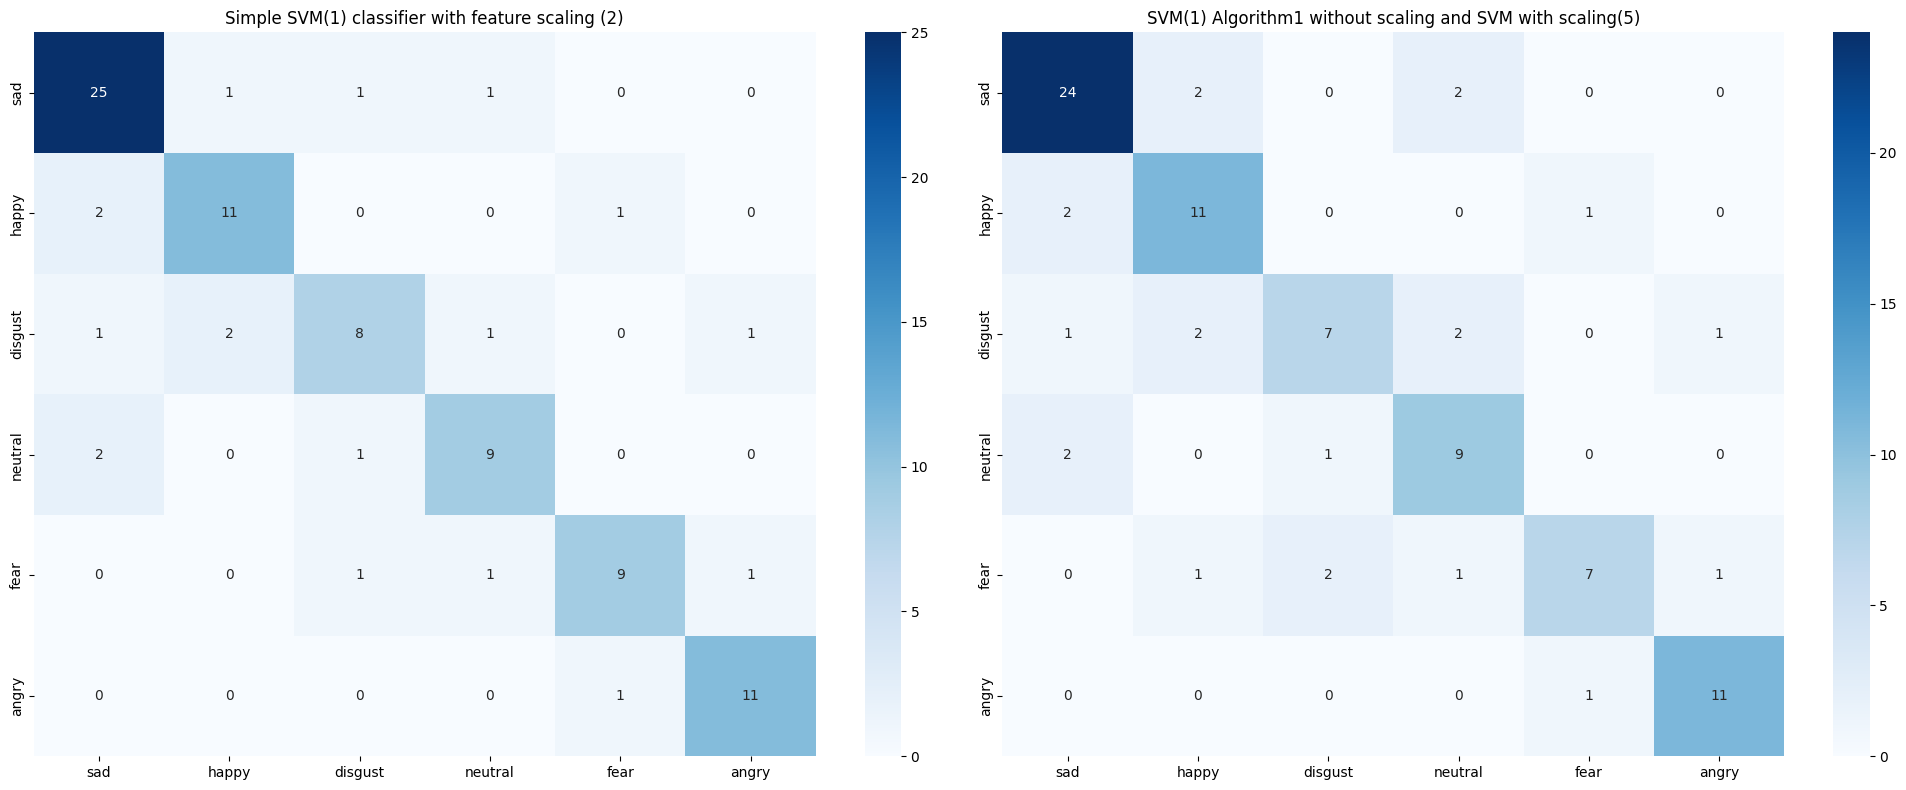

In [18]:
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

emo_set = set(emotions)

print(classification_report(y_test, pred16, target_names=set(emotions)))

n_total_features = X_train.shape[1]
mask = np.zeros(n_total_features)
mask[fs.selected_indices] = 1
plot_feature_mask(mask, 'Mask of Selected Features')

# Comparison
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.heatmap(confusion_matrix(y_test, pred16), 
            annot=True, fmt='d', cmap='Blues',
            xticklabels=emo_set,
            yticklabels=emo_set,
            ax=ax[0])
ax[0].set_title('Simple SVM(1) classifier with feature scaling (2)')
sns.heatmap(confusion_matrix(y_test, pred15), 
            annot=True, fmt='d', cmap='Blues',
            xticklabels=emo_set,
            yticklabels=emo_set,
            ax=ax[1])
ax[1].set_title('SVM(1) Algorithm1 without scaling and SVM with scaling(5)')
plt.tight_layout()
plt.show()



## Feature selection with algorithm 2

In [ ]:
# Create a FeatureSelector object with algorithm2 and L=0.95
L=0.95
fs2 = FeatureSelector(algorithm="algorithm2", L=L)
fs2_sel = FeatureSelector(algorithm="algorithm2", L=L)
fs2_scaled = FeatureSelector(algorithm="algorithm2", L=L)
# Fit the selector to original data and on data selected by algorithm1 without previous scaling (clf15)
fs2.fit(X_train)
fs2_sel.fit(X_train_sel)

print("Number of features selected on original data:", len(fs2.selected_indices))
X_train_sel2 = fs2.transform(X_train)
X_test_sel2 = fs2.transform(X_test)
X_train_scaled_sel2 = fs2.transform(X_train_scaled)
X_test_scaled_sel2 = fs2.transform(X_test_scaled)
print("Number of features selected on data selected by algorithm1 without previous scaling:", len(fs2_sel.selected_indices))
X_train_sel_sel2 = fs2_sel.transform(X_train_sel)
X_test_sel_sel2 = fs2_sel.transform(X_test_sel)
X_train_scaled_sel_sel2 = fs2_sel.transform(X_train_scaled_sel)
X_test_scaled_sel_sel2 = fs2_sel.transform(X_test_scaled_sel)

## SVM(1) Algorithm2 only on X_train and SVM without scaling(8)
clf18 = svm.SVC(kernel='linear')
clf18.fit(X_train_sel2, y_train)
pred18 = clf18.predict(X_test_sel2)
#print(classification_report(y_test, pred18, target_names=set(emotions)))
print("SVM(1) Algorithm2 only on X_train and SVM without scaling(8) Accuracy:", accuracy_score(y_test, pred18))

## SVM(1) Algorithm2 only on X_train and SVM with scaling (9)
clf19 = svm.SVC(kernel='linear')
clf19.fit(X_train_scaled_sel2, y_train)
pred19 = clf19.predict(X_test_scaled_sel2)
#print(classification_report(y_test, pred19, target_names=set(emotions)))
print("SVM(1) Algorithm2 only on X_train and SVM with scaling (9) Accuracy:", accuracy_score(y_test, pred19))

## SVM(1) Algorithm2 after selection by Alg1 SVM without scaling(10)
clf110 = svm.SVC(kernel='linear')
clf110.fit(X_train_sel_sel2, y_train)
pred110 = clf110.predict(X_test_sel_sel2)
#print(classification_report(y_test, pred110, target_names=set(emotions)))
print("SVM(1) Algorithm2 after selection by Alg1 SVM without scaling(10) Accuracy:", accuracy_score(y_test, pred110))

## SVM(1) Algorithm2 after selection by Alg1 and SVM with scaling (11)
clf111 = svm.SVC(kernel='linear')
clf111.fit(X_train_scaled_sel_sel2, y_train)
pred111 = clf111.predict(X_test_scaled_sel_sel2)
#print(classification_report(y_test, pred111, target_names=set(emotions)))
print("SVM(1) Algorithm2 after selection by Alg1 and SVM with scaling (11) Accuracy:", accuracy_score(y_test, pred111))



Number of features selected on original data: 21
Number of features selected on data selected by algorithm1 without previous scaling: 19
SVM(1) Algorithm2 only on X_train and SVM without scaling(8) Accuracy: 0.5794392523364486
SVM(1) Algorithm2 only on X_train and SVM with scaling (9) Accuracy: 0.6822429906542056
SVM(1) Algorithm2 after selection by Alg1 SVM without scaling(10) Accuracy: 0.5700934579439252
SVM(1) Algorithm2 after selection by Alg1 and SVM with scaling (11) Accuracy: 0.6915887850467289


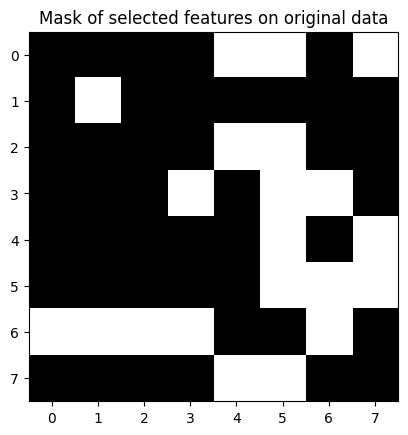

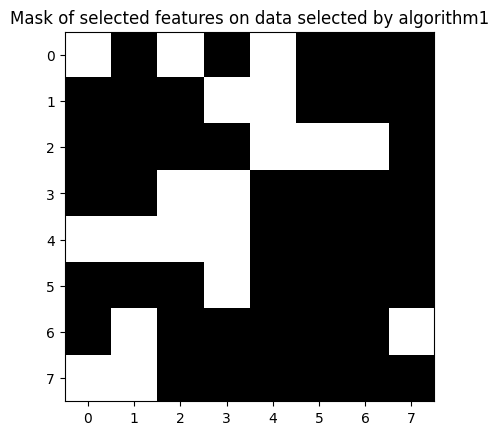

In [48]:
# plot the mask of selected features on original data
n_total_features = X_train.shape[1]
mask = np.zeros(n_total_features)
mask[fs2.selected_indices] = 1
plot_feature_mask(mask, 'Mask of selected features on original data')

# plot the mask of selected features on data selected by algorithm1 without previous scaling
n_total_features = X_train_sel.shape[1]
mask = np.zeros(n_total_features)
mask[fs2_sel.selected_indices] = 1
plot_feature_mask(mask, 'Mask of selected features on data selected by algorithm1')


In [62]:
L = 0.95
fs2_scaled = FeatureSelector(algorithm="algorithm2", L=L)
fs2_scaled.fit(X_train_scaled_sel)
print("Number of features selected on scaled data:", len(fs2_scaled.selected_indices))
X_train_sel2_scaled = fs2_scaled.transform(X_train_scaled)
X_test_sel2_scaled = fs2_scaled.transform(X_test_scaled)

scaler_sel2 = StandardScaler()
X_train_sel2_scaled_sc = scaler_sel2.fit_transform(X_train_sel2)
X_test_sel2_scaled_sc = scaler_sel2.transform(X_test_sel2)

## SVM(1) Algorithm2 only on X_train and SVM with scaling (12)
clf112 = svm.SVC(kernel='linear')
clf112.fit(X_train_sel2_scaled, y_train)
pred112 = clf112.predict(X_test_sel2_scaled)
#print(classification_report(y_test, pred112, target_names=set(emotions)))
print("SVM(1) Algorithm2 only on X_train and SVM with scaling (12) Accuracy:", accuracy_score(y_test, pred112))

clf113 = svm.SVC(kernel='linear')
clf113.fit(X_train_sel2_scaled_sc, y_train)
pred113 = clf113.predict(X_test_sel2_scaled_sc)
print(classification_report(y_test, pred113, target_names=set(emotions)))
print("SVM(1) Algorithm2 only on X_train and SVM with scaling (13) Accuracy:", accuracy_score(y_test, pred113))

Number of features selected on scaled data: 54
SVM(1) Algorithm2 only on X_train and SVM with scaling (12) Accuracy: 0.7383177570093458
              precision    recall  f1-score   support

     neutral       0.82      0.82      0.82        33
        fear       0.79      0.61      0.69        18
     boredom       0.43      0.86      0.57         7
   happiness       0.65      0.65      0.65        17
     sadness       0.64      0.47      0.54        15
     disgust       0.36      0.50      0.42         8
       anger       1.00      0.78      0.88         9

    accuracy                           0.68       107
   macro avg       0.67      0.67      0.65       107
weighted avg       0.72      0.68      0.69       107

SVM(1) Algorithm2 only on X_train and SVM with scaling (13) Accuracy: 0.6822429906542056


## Random Forest (2) on best SVM (1) results (5 and 12)

In [63]:
from sklearn.ensemble import RandomForestClassifier

## Random Forest Classifier on experiment 5
clf25 = RandomForestClassifier()
clf25.fit(X_train_scaled_sel, y_train)
pred25 = clf25.predict(X_test_scaled_sel)
print(classification_report(y_test, pred25, target_names=set(emotions)))

              precision    recall  f1-score   support

     neutral       0.75      0.73      0.74        33
        fear       0.80      0.67      0.73        18
     boredom       0.62      0.71      0.67         7
   happiness       0.64      0.53      0.58        17
     sadness       0.33      0.27      0.30        15
     disgust       0.38      0.75      0.50         8
       anger       0.80      0.89      0.84         9

    accuracy                           0.64       107
   macro avg       0.62      0.65      0.62       107
weighted avg       0.65      0.64      0.64       107



In [64]:
## Random Forest Classifier on experiment 12
clf212 = RandomForestClassifier()
clf212.fit(X_train_sel2_scaled, y_train)
pred212 = clf212.predict(X_test_sel2_scaled)
print(classification_report(y_test, pred212, target_names=set(emotions)))

              precision    recall  f1-score   support

     neutral       0.78      0.76      0.77        33
        fear       0.83      0.83      0.83        18
     boredom       0.71      0.71      0.71         7
   happiness       0.75      0.53      0.62        17
     sadness       0.35      0.40      0.38        15
     disgust       0.55      0.75      0.63         8
       anger       0.80      0.89      0.84         9

    accuracy                           0.69       107
   macro avg       0.68      0.70      0.68       107
weighted avg       0.70      0.69      0.69       107

